# Download Data

In [1]:
import requests
import pandas as pd
from io import BytesIO

def download_csv(csv_url):
    response = requests.get(csv_url)
    response.raise_for_status()

    # Qui puoi modificare 'sep' o aggiungere altri parametri se necessario
    try:
        df = pd.read_csv(BytesIO(response.content), sep=',')
    except pd.errors.ParserError:
        df = pd.read_csv(BytesIO(response.content), sep=';', error_bad_lines=False)

    return df

In [2]:
recipes_df = download_csv("https://github.com/GiovTemp/SustainaMeal_Case_Study/raw/main/data/valid_recipes_dataset.csv")

In [3]:
recipes_df

,title,sustainability_score,sustainability_label,Unnamed: 0,recipe_id,description,author_id,duration,directions,ingredients,...,sugars [g],protein [g],direction_size,ingredients_sizes,who_score,fsa_score,nutri_score,normalization_comment,ingredient_food_kg_urls,ingredient_food_kg_names
0,Jack O Lantern 'o Fragrance,0.002409,0,495656,466123,I suppose that this isn't really a recipe as m...,169430,30.0,['When you cut the lid out of the pumpkin do ...,"['pumpkin liking', 'candle pumpkin', 'pumpkin ...",...,0.3,0.6,7,4,0.302381,0.250,0.25,NaN,NaN,NaN
1,Boiled Radishes,0.002502,0,294268,179840,These taste a lot like new potatoes. The boil...,254469,22.0,"['Trim ends and bad spots off Radishes.', 'Boi...","['radishes size bag bunch', 'water radishes']",...,2.4,0.8,2,2,0.293040,1.000,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['applesauce', 'garlic clove', 'ginger', 'mola..."
2,Horseradish Applesauce,0.002590,0,364381,174389,"I'm not sure this even qualifies as a recipe, ...",226918,22.0,"['Blend applesauce and horseradish. ', 'Refrig...","['applesauce', 'horseradish']",...,0.6,0.3,2,2,0.313757,0.875,0.50,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['all - purpose flour', 'butter', 'butternut s..."
3,Survival Necklace,0.002623,0,43445,95937,Fun for kids to make and a great way to keep t...,25792,10.0,['Other supplies: 18 inches string or yarn or ...,['Fruit Loops cereal cup apple jacks kind hole...,...,1.2,8.8,7,2,0.319215,0.750,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Old Bay Seasoning', 'Worcestershire sauce', ..."
4,Apple Cider Reduction,0.002623,0,59722,521756,I saw a post about this on Facebook and gave i...,171084,155.0,"['In 6-8 quart stock pan, measure out 2 cups o...","['gallon apple cider fresh', 'gallon apple cid...",...,0.0,0.0,10,2,0.214286,0.750,0.75,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['bean sprouts', 'chicken thighs', 'fresh ging..."
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
100865,Curried Lamb on Rice,0.951024,2,103145,373244,"With modification this recipe is from ""The Dia...",133174,65.0,"['Over medium heat, melt the butter in a large...","['lamb', 'medium onion', 'cloves', 'butter', '...",...,3.4,28.7,5,13,0.223549,0.625,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['Dijon mustard', 'Polish sausage', 'apricot p..."
100866,Rich Lamb Curry,0.960504,2,442694,268247,The recipe isn't as time consuming as it looks...,491437,110.0,"['Heat 1 tbsp olive oil in dutch oven. ', 'Co...","['oil', 'lamb', 'flour', 'salt pepper', 'onion...",...,30.4,36.1,9,21,0.153328,0.000,0.00,NaN,NaN,NaN
100867,"Middle Eastern Slow-Cooked Stew With Lamb, Chi...",0.968458,2,359960,144850,From Cooking Light. Per 3/4 c. serving: 310 ca...,37779,112.0,['Let the oil get heating in a large pot over ...,"['oil', 'lamb', 'onions rings', 'water', 'clov...",...,20.1,20.8,12,19,0.205566,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"['anchovies', 'celery ribs', 'diced tomatoes',..."
100868,Five Meat Chili Con Carne With Beans,0.971454,2,37637,13568,yum,20571,210.0,"['In a large pot brown meat in stages, about a...","['beef', 'pork', 'lamb', 'sausage', 'sausage',...",...,6.6,14.5,7,15,0.197568,0.250,0.25,NaN,['http://idea.rpi.edu/heals/kb/ingredientname/...,"[""French\\'s French fried onions"", 'crabmeat',..."


# Utils

In [4]:
!pip install git+https://github.com/GiovTemp/SustainaMeal.git

  Cloning https://github.com/GiovTemp/SustainaMeal.git to /tmp/pip-req-build-plsnchdw
  Running command git clone --filter=blob:none --quiet https://github.com/GiovTemp/SustainaMeal.git /tmp/pip-req-build-plsnchdw
  Resolved https://github.com/GiovTemp/SustainaMeal.git to commit 721959fa9065605ccf101359e95e17c5b688ec14
  Preparing metadata (setup.py) ... done
  Preparing metadata (setup.py) ... done
  Created wheel for SustainaMeal: filename=SustainaMeal-0.1.0-py3-none-any.whl size=13122 sha256=6459438887a9d987ece32a6f6e16be9c748e0efc7c9320124604632f51743d1b
  Stored in directory: /tmp/pip-ephem-wheel-cache-0t31jeaa/wheels/27/eb/bb/09df695e710464e35f72a5a0a9841858413db51a2dfb4154c7
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5099 sha256=c335d379c25d43e582a8bc8e2195836cbd926b68ac4f979075f5d7b3dba6a67a
  Stored in directory: /root/.cache/pip/wheels/a5/70/eb/1d28795e9384ab3b9be6359bdde9e1652f6e7dab9d26844f70
Successfully built SustainaMeal collection


# SustainaMeal (ETA: 15/20 mins)

Initializes the system by loading the data and preparing the embeddings.

In [12]:
from sustainameal import SustainaMeal

nutrients=['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
#nutrients = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

sm = SustainaMeal(
    recipes_df=recipes_df,
    nutrients=['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]'],
    transformer_name='davanstrien/autotrain-recipes-2451975973'
)

Processing Titles embeddings: 100%|██████████| 100870/100870 [17:27<00:00, 96.33batch/s]


In [6]:
import pandas as pd
import ast
import json
from collections import Counter
# Supponiamo che recipes_df sia il tuo DataFrame originale con tutte le ricette

# Calcola la media di who_score
mean_who_score = recipes_df['who_score'].mean()

acceptable_tags = ['appetizers', 'main-dish', 'side-dishes', 'drinks', 'beverages', 'fruits', 'desserts',
                   'breakfast', 'pasta-rice-and-grains', 'rice', 'pasta', 'pizza', 'breads', 'meat', 'fish',
                   'seafood', 'beef', 'chicken', 'vegetarian']

def has_acceptable_tag(tags_str):
    try:
        # Converte la stringa in una lista
        tags = ast.literal_eval(tags_str)
    except (ValueError, SyntaxError):
        # Gestisce eventuali errori nella conversione
        tags = []
    # Controlla se almeno un tag è in acceptable_tags
    return any(tag in acceptable_tags for tag in tags)

# Inizializza un set vuoto per tenere traccia degli ID delle ricette già selezionati
selected_recipe_ids = set()

# Funzione per selezionare ricette uniche da un DataFrame
def select_unique_recipes(df, count=100):
    global selected_recipe_ids
    unique_df = df[~df['recipe_id'].isin(selected_recipe_ids)].sample(min(count, len(df)))
    selected_recipe_ids.update(unique_df['recipe_id'])
    return unique_df

# Filtra le ricette con un who_score superiore alla media e almeno un tag accettabile
high_who_score_recipes = select_unique_recipes(recipes_df[(recipes_df['who_score'] > mean_who_score) &
                                                          (recipes_df['tags'].apply(has_acceptable_tag))])

# Filtra le ricette con sustainability_label = 1 e almeno un tag accettabile
sustainability_label_1_recipes = select_unique_recipes(recipes_df[(recipes_df['sustainability_label'] == 1) &
                                                                  (recipes_df['tags'].apply(has_acceptable_tag))])

# Filtra le ricette con sustainability_label = 2 e almeno un tag accettabile
sustainability_label_2_recipes = select_unique_recipes(recipes_df[(recipes_df['sustainability_label'] == 2) &
                                                                  (recipes_df['tags'].apply(has_acceptable_tag))])

# Unisci le ricette selezionate
selected_recipes = pd.concat([high_who_score_recipes, sustainability_label_1_recipes, sustainability_label_2_recipes])


In [7]:
len(selected_recipes)

300

In [13]:
nutrients_string = ", ".join(nutrients)
print(nutrients_string)


calories [cal], totalFat [g], sodium [mg], dietaryFiber [g], sugars [g], protein [g]


In [9]:
results = []

In [ ]:
# Parametri per gli esperimenti
k_values = [10, 50, 100]
match_all_tags_values = [True, False]

def convert_to_serializable(obj):
    """
    Converte oggetti in formati serializzabili in JSON.
    Gestisce DataFrame, array NumPy e altri tipi non serializzabili.
    """
    if hasattr(obj, 'to_dict'):
        # Converti il DataFrame pandas in un dizionario
        return obj.to_dict('records')
    elif hasattr(obj, 'tolist'):
        # Converti l'array NumPy in una lista
        return obj.tolist()
    elif isinstance(obj, (list, dict, str, int, float, bool, type(None))):
        # Tipi già serializzabili in JSON
        return obj
    else:
        # Converti altri tipi in stringa o implementa altre conversioni
        return str(obj)



for index, row in selected_recipes.iterrows():
    input_recipe = row['title']
    for k in k_values:
        for match_all_tags in match_all_tags_values:
            similar_recipes = sm.find_similar_recipes(input_recipe, k, acceptable_tags, match_all_tags=match_all_tags)
            recipe_by_sustainameal_score = sm.order_recipe_by_sustainameal()

            result = {
                'recipe_name': input_recipe,
                'recipe_id': row['recipe_id'],
                'sustnability_score': row['sustainability_score'],
                'who_score': row['who_score'],
                'k': k,
                'nutrients' : nutrients_string,
                'match_all_tags': match_all_tags,
                'similar_recipes': convert_to_serializable(similar_recipes),
                'ordered_by_sustainameal': convert_to_serializable(recipe_by_sustainameal_score[:10])
            }
            results.append(result)



In [15]:
len(results)

3600

In [16]:
with open('experiment_results.json', 'w') as file:
    json.dump(results, file)


In [48]:
import json
import pandas as pd

# Carica i dati dal file JSON
with open('experiment_results.json', 'r') as file:
    experiment_data = json.load(file)

# Converti i dati in un DataFrame
experiment_df = pd.DataFrame(experiment_data)

# Assumiamo di avere gli ID delle ricette per ogni sottogruppo
high_who_score_ids = high_who_score_recipes['recipe_id'].unique()
sustainability_label_1_ids = sustainability_label_1_recipes['recipe_id'].unique()
sustainability_label_2_ids = sustainability_label_2_recipes['recipe_id'].unique()

# Assumiamo che le variabili high_who_score_recipes, sustainability_label_1_recipes e sustainability_label_2_recipes
# contengano gli ID delle ricette per ciascun sottogruppo.

# Estrarre gli incrementi dalle liste di dizionari nella colonna 'ordered_by_sustainameal'
def estrai_incrementi(ordered_list, key):
    # Estrai il valore dell'incremento da ciascun dizionario nella lista
    return [d[key] for d in ordered_list if key in d]

# Aggiungere colonne di incremento al DataFrame
experiment_df['healthiness_increment'] = experiment_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'healthiness_increment'))
experiment_df['sustainability_increment'] = experiment_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainability_increment'))
experiment_df['sustainameal_score_increment'] = experiment_df['ordered_by_sustainameal'].apply(lambda x: estrai_incrementi(x, 'sustainameal_score_increment'))

# Calcolare la media degli incrementi
experiment_df['healthiness_increment_mean'] = experiment_df['healthiness_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
experiment_df['sustainability_increment_mean'] = experiment_df['sustainability_increment'].apply(lambda x: sum(x) / len(x) if x else 0)
experiment_df['sustainameal_score_increment_mean'] = experiment_df['sustainameal_score_increment'].apply(lambda x: sum(x) / len(x) if x else 0)

# Ora possiamo utilizzare queste nuove colonne per calcolare le medie sottogruppo
def calcola_medie_sottogruppo(subgroup_df):
    # Calcola le medie degli incrementi per il sottogruppo dato
    return subgroup_df.groupby(['k', 'nutrients', 'match_all_tags']).agg({
        'healthiness_increment_mean': 'mean',
        'sustainability_increment_mean': 'mean',
        'sustainameal_score_increment_mean': 'mean'
    }).reset_index()

# Filtra il DataFrame sperimentale in base agli ID delle ricette per ottenere i sottogruppi
high_who_score_df = experiment_df[experiment_df['recipe_id'].isin(high_who_score_ids)]
sustainability_label_1_df = experiment_df[experiment_df['recipe_id'].isin(sustainability_label_1_ids)]
sustainability_label_2_df = experiment_df[experiment_df['recipe_id'].isin(sustainability_label_2_ids)]

# Calcolare le medie per ogni sottogruppo
medie_high_who_score = calcola_medie_sottogruppo(high_who_score_df)
medie_sustainability_label_1 = calcola_medie_sottogruppo(sustainability_label_1_df)
medie_sustainability_label_2 = calcola_medie_sottogruppo(sustainability_label_2_df)

# Visualizzare le medie per ogni sottogruppo
print("Medie High WHO Score:")
print(medie_high_who_score)
print("\nMedie Sustainability Label 1:")
print(medie_sustainability_label_1)
print("\nMedie Sustainability Label 2:")
print(medie_sustainability_label_2)




Medie High WHO Score:
      k                                          nutrients  match_all_tags  \
0    10  calories [cal], totalFat [g], saturatedFat [g]...           False   
1    10  calories [cal], totalFat [g], saturatedFat [g]...            True   
2    10  calories [cal], totalFat [g], sodium [mg], die...           False   
3    10  calories [cal], totalFat [g], sodium [mg], die...            True   
4    50  calories [cal], totalFat [g], saturatedFat [g]...           False   
5    50  calories [cal], totalFat [g], saturatedFat [g]...            True   
6    50  calories [cal], totalFat [g], sodium [mg], die...           False   
7    50  calories [cal], totalFat [g], sodium [mg], die...            True   
8   100  calories [cal], totalFat [g], saturatedFat [g]...           False   
9   100  calories [cal], totalFat [g], saturatedFat [g]...            True   
10  100  calories [cal], totalFat [g], sodium [mg], die...           False   
11  100  calories [cal], totalFat [g], sod

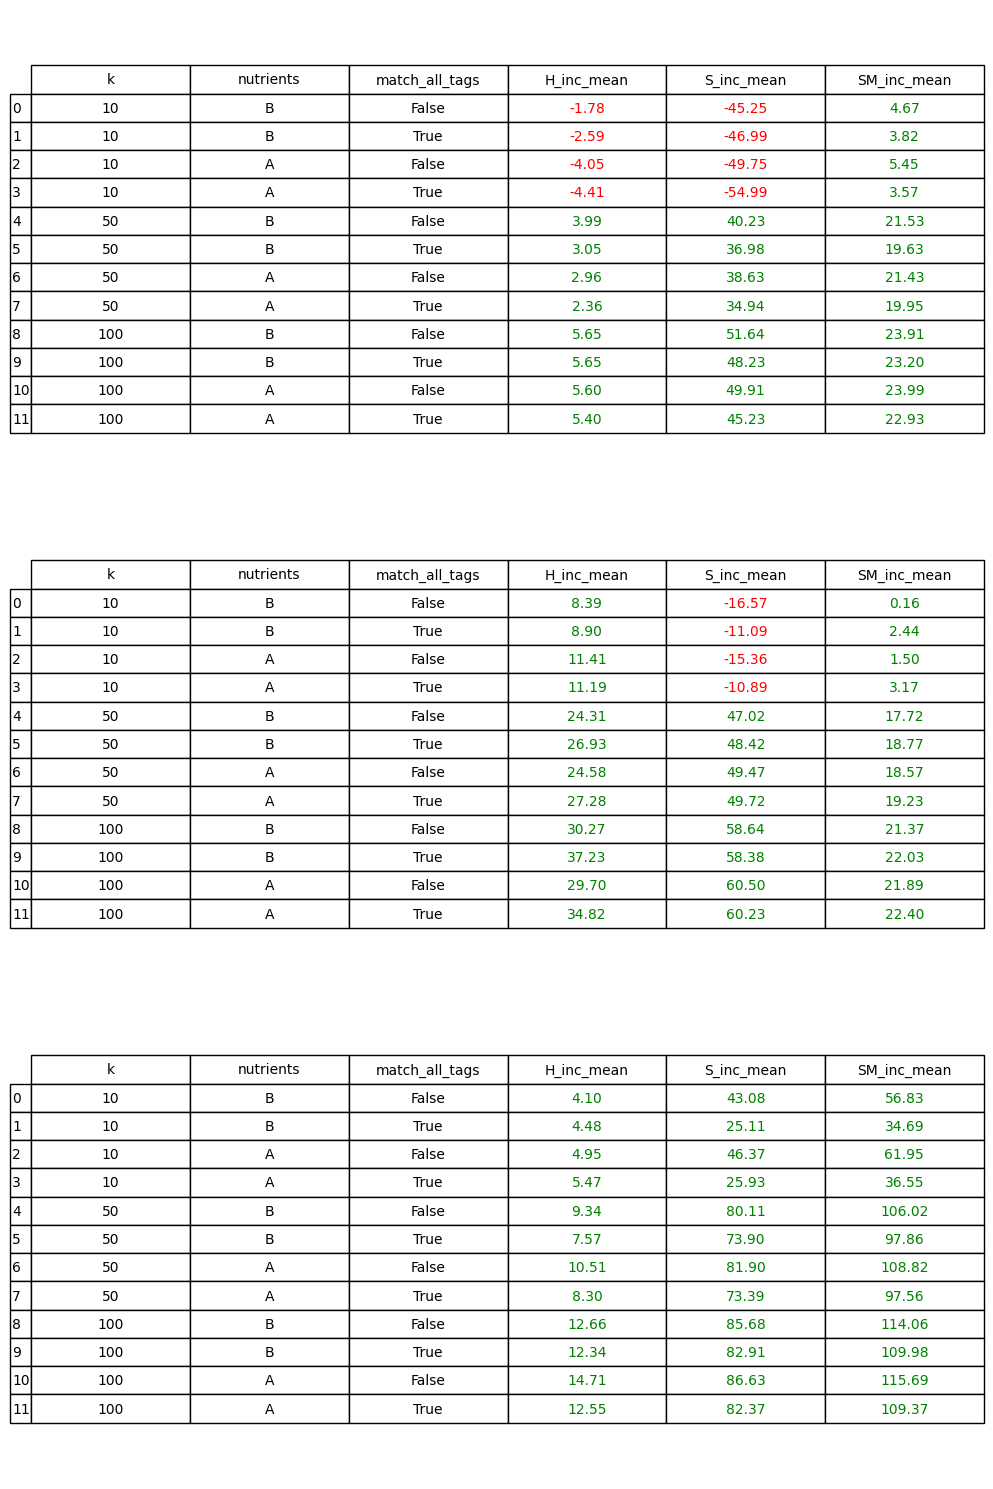

In [49]:
import matplotlib.pyplot as plt
from pandas.plotting import table

# Assumiamo che medie_high_who_score, medie_sustainability_label_1 e medie_sustainability_label_2 siano i DataFrame


# Funzione per abbreviare i titoli delle colonne
def abbreviate_column_names(df):
    abbreviations = {'healthiness_increment_mean': 'H_inc_mean',
                     'sustainability_increment_mean': 'S_inc_mean',
                     'sustainameal_score_increment_mean': 'SM_inc_mean'}
    return df.rename(columns=abbreviations)

# Applica l'abbreviazione ai nomi delle colonne per ogni DataFrame
medie_high_who_score = abbreviate_column_names(medie_high_who_score)
medie_sustainability_label_1 = abbreviate_column_names(medie_sustainability_label_1)
medie_sustainability_label_2 = abbreviate_column_names(medie_sustainability_label_2)

nutrients_A = ['calories [cal]', 'totalFat [g]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']
nutrients_B = ['calories [cal]', 'totalFat [g]', 'saturatedFat [g]', 'cholesterol [mg]', 'sodium [mg]', 'dietaryFiber [g]', 'sugars [g]', 'protein [g]']

# Funzione per sostituire la stringa dei nutrienti con 'A' o 'B'
def replace_nutrients(nutrient_string):
    if nutrient_string == ', '.join(nutrients_A):
        return 'A'
    elif nutrient_string == ', '.join(nutrients_B):
        return 'B'
    else:
        return 'Unknown'

# Applicazione della funzione di sostituzione ai DataFrame
medie_high_who_score['nutrients'] = medie_high_who_score['nutrients'].apply(replace_nutrients)
medie_sustainability_label_1['nutrients'] = medie_sustainability_label_1['nutrients'].apply(replace_nutrients)
medie_sustainability_label_2['nutrients'] = medie_sustainability_label_2['nutrients'].apply(replace_nutrients)

# Funzione per colorare i valori in base al segno
def color_negative_red_positive_green(value):
    if value < 0:
        return 'red'
    elif value > 0:
        return 'green'
    else:
        return 'black'

# Funzione per colorare i valori in base al segno e arrotondare i numeri
def apply_formatting(tbl, df):
    for (i, j), cell in tbl.get_celld().items():
        if j < 2 or i == 0:  # Salta le prime due colonne e l'intestazione
            continue
        val = cell.get_text().get_text()
        try:
            num = float(val)
            cell.get_text().set_text(f'{num:.2f}')
            cell.get_text().set_color('green' if num > 0 else 'red' if num < 0 else 'black')
        except ValueError:
            pass  # Non è un numero, non fare nulla

# Crea una figura per contenere le tabelle
fig, axs = plt.subplots(3, 1, figsize=(10, 15))

# Disegna le tabelle su ogni subplot e applica la formattazione
for ax, df in zip(axs.flat, [medie_high_who_score, medie_sustainability_label_1, medie_sustainability_label_2]):
    ax.axis('off')
    tbl = table(ax, df, loc='center', cellLoc='center')
    tbl.auto_set_font_size(False)
    tbl.set_fontsize(10)
    tbl.scale(1.2, 1.2)
    apply_formatting(tbl, df)  # Applica il colore e l'arrotondamento qui

plt.tight_layout()
plt.show()

